In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

# Affichage des données

In [234]:
df = pd.read_excel("coordonnees_2.xlsx",index_col=0)
df.head()

,Latitude,Longitude
0,33.574527,-7.633873
1,33.564006,-7.633567
2,33.562512,-7.566599
3,33.566013,-7.538102
4,33.552676,-7.634195


In [235]:
print(len(df))

100


Text(0, 0.5, 'Longitude')

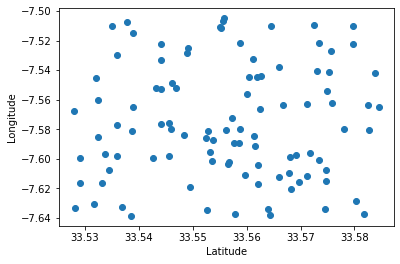

In [236]:
plt.scatter(df.Latitude,df.Longitude)
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Pré-traitement des données

In [237]:
scaler = MinMaxScaler()
scaler.fit(df[['Longitude']])
df['Longitude'] = scaler.transform(df[['Longitude']])

scaler.fit(df[['Latitude']])
df['Latitude'] = scaler.transform(df[['Latitude']])

In [238]:
df.head()

,Latitude,Longitude
0,0.823878,0.034857
1,0.637647,0.037152
2,0.611219,0.538513
3,0.673176,0.751861
4,0.437112,0.032445


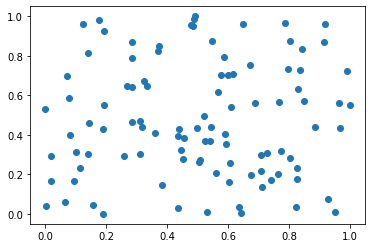

In [239]:
plt.scatter(df['Latitude'],df['Longitude'])

# Méthode du coude (Elbow Method)

In [240]:
scr = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Latitude','Longitude']])
    scr.append(km.inertia_)

C:\Users\joukre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


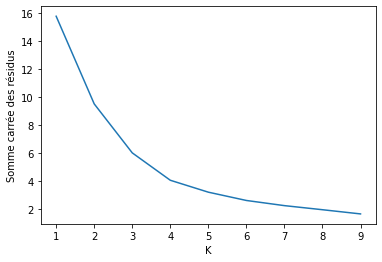

In [241]:
plt.xlabel('K')
plt.ylabel('Somme carrée des résidus')
plt.plot(k_rng,scr)

# Construction de clusters avec k-means

In [242]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Latitude','Longitude']])
y_predicted

array([3, 3, 4, 2, 3, 0, 3, 0, 2, 2, 2, 3, 3, 2, 3, 1, 1, 1, 4, 2, 4, 0,
       4, 2, 1, 3, 4, 2, 2, 4, 0, 4, 2, 0, 0, 0, 3, 2, 2, 0, 1, 0, 1, 4,
       4, 2, 4, 3, 4, 3, 3, 2, 1, 1, 4, 1, 0, 2, 2, 2, 4, 3, 0, 3, 2, 4,
       3, 2, 3, 4, 1, 1, 0, 1, 3, 1, 2, 1, 0, 0, 3, 4, 4, 1, 1, 4, 4, 2,
       0, 4, 3, 0, 1, 3, 2, 4, 0, 3, 2, 1])

In [243]:
df['cluster']=y_predicted
df.head()

,Latitude,Longitude,cluster
0,0.823878,0.034857,3
1,0.637647,0.037152,3
2,0.611219,0.538513,4
3,0.673176,0.751861,2
4,0.437112,0.032445,3


In [244]:
km.cluster_centers_

array([[0.10787345, 0.2860495 ],
       [0.31757633, 0.83836855],
       [0.78756474, 0.70648624],
       [0.71379111, 0.16079345],
       [0.45875502, 0.38017187]])

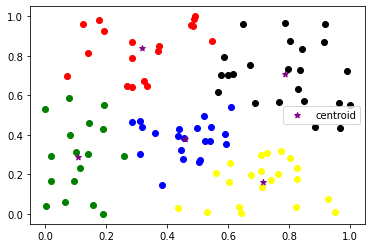

In [245]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1.Latitude,df1.Longitude,color='green')
plt.scatter(df2.Latitude,df2.Longitude,color='red')
plt.scatter(df3.Latitude,df3.Longitude,color='black')
plt.scatter(df4.Latitude,df4.Longitude,color='yellow')
plt.scatter(df5.Latitude,df5.Longitude,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# Importation des donées de chaque cluster dans une feuille excel

In [158]:
with pd.ExcelWriter('clusters_test.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='Feuille_1')
    df2.to_excel(writer, sheet_name='Feuille_2')
    df3.to_excel(writer, sheet_name='Feuille_3')
    df4.to_excel(writer, sheet_name='Feuille_4')
    df5.to_excel(writer, sheet_name='Feuille_5')